<a href="https://colab.research.google.com/github/kavyasree761/hotel-booking-analysis/blob/main/Copy_of_Team_notebook_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b> Explore and analyze the data to discover important factors that govern the bookings. </b>

###<b> Before starting with analysis or visualisation of any data, we first need to work on understanding the data and the preparing the data. This would make the data suitable to work with and help us obtain accurate results

### The processs for the same is done in the following setps:

1. Obtaining the data.
2. Understanding the data.
3. Preparing the data.
4. EDA and Visualisation.



## <B> Obtaining the data

In [1]:
#importing the libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
pd.set_option("display.max_columns",50)  #setting the view to show all columns

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#storing the data for analysis
path='/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv'
hotel=pd.read_csv(path)

##<b> Understanding the data

### Exploring the dataset.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
hotel.head() #viewing the data to get brief picture

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
hotel.shape #to get the number of rows and columns

(119390, 32)

In [12]:
hotel.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


Here we can see that the data with us has 119390 rows and 32 columns.
Each row is the data for a different booking.

In [13]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Quick observations:
* 37.04 % of the people have cancelled their booking as per the dataset.
* Avg. lead time is 104 days.
* Only 3% of the guests are repeated.
*Average adr is 102



##<b> Preparig the data.

In [14]:
#checking the dataset for number of entries and datatypes of every column
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We can see there are a few null values present in the data available. So now we calculate the null values.

In [15]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We observe that the column company has the most null values. We now calculate the percentage of null values.

In [16]:
print((hotel.isnull().sum()/len(hotel.index))*100)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

We have about 94% of the data null in the columns 'Company'. This is a large percentage of the data and cannot be used for analysis and visualization. Thus we have to drop the column.

In [17]:
hotel = hotel.drop(['company'], axis=1) #removing the column which is almost completely null

The column agent has 13% of the values as null so we can replace them with 0.

In [18]:
hotel['agent'] = hotel['agent'].fillna(0) #filling rows with null values

In [19]:
hotel.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

There is still a small portion of values which are null.
The column country still has some null values which is about 0.408%. As it is a small percentage we can drop the rows as it won't affect our analysis. The same is to be done with the null values for children.

In [20]:
hotel=hotel.dropna(axis=0) #dropping null values

In [21]:
hotel.isnull().sum()  #to check if there are any null values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

###Renaming the columns to make it easy to understand and later call during analysis.

In [22]:
print(list(hotel.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [23]:
hotel.columns = ['Hotel_name', 'Canceled', 'Lead_time', 'Visit_year', 'Visit_month', 'Visit_week', 'Visit_date', 'Weekend_stay', 'Weekday_stay', 'Adults', 'Children', 'Babies', 'Meal', 'Country', 'Segment', 'Dist_channel', 'Repeated_guest', 'Prev_cancel', 'Prev_bookings', 'Reserved_room', 'Assigned_room', 'Change_booking', 'Deposit_type','Agent', 'Waiting_days', 'Customer_type', 'ADR', 'Parking_space', 'Special_requests', 'Reservation_status', 'Reservation_date']

###Next we need to check for outliers in the data as it could affect our analysis.

In [24]:
list_unique = pd.DataFrame([[i,len(hotel[i].unique())] for i in hotel.columns])
list_unique.columns = ["name" , "unique"]   #obtaining the unique values

Testing the data set for outliers by taking a few entires and plotting box plot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

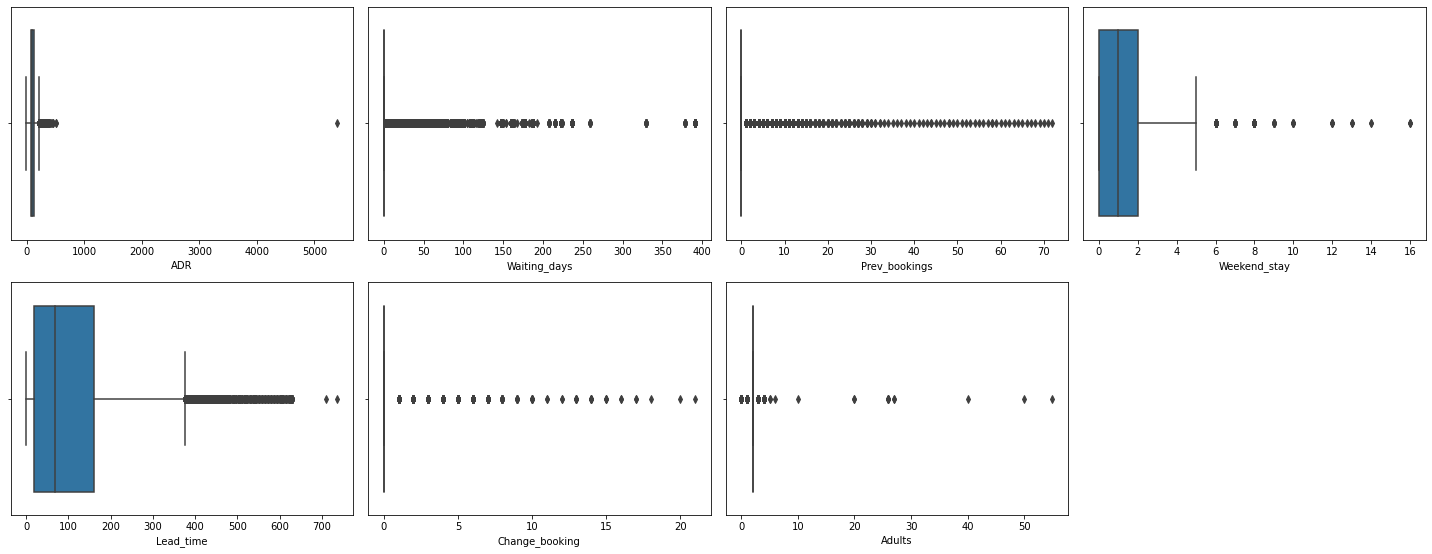

In [25]:
test_list = ['ADR', 'Waiting_days', 'Prev_bookings', 'Weekend_stay', 'Lead_time', 'Change_booking','Adults']
plt.figure(figsize=(20,15)) 
n=1
for test in test_list:
  plt.subplot(4,4,n)
  sns.boxplot(hotel[test])
  n=n+1
  plt.tight_layout()

As we can see there are outliers present in the data, which will lead to noise in the analysis, so we need to remove them to make the data more reliable.

In [26]:
hotel.describe()

,Canceled,Lead_time,Visit_year,Visit_week,Visit_date,Weekend_stay,Weekday_stay,Adults,Children,Babies,Repeated_guest,Prev_cancel,Prev_bookings,Change_booking,Agent,Waiting_days,ADR,Parking_space,Special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,74.896264,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,107.145761,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


So we can see that the columns like ADR, Lead_time, Adults, Children, Babies, Prev_cancel, Prev_bookings, Parking_space have outliers.

In [27]:
#Treating the outliers
hotel.loc[hotel.Prev_bookings > 0, 'Prev_bookings'] = 1
hotel.loc[hotel.Prev_cancel > 0, 'Prev_cancel'] = 1
hotel.loc[hotel.Adults > 4, 'Adults'] = 4
hotel.loc[hotel.Lead_time > 500, 'Lead_time'] = 500
hotel.loc[hotel.ADR > 600, 'ADR'] = 600
hotel.loc[hotel.Babies > 3, 'Babies'] = 0
hotel.loc[hotel.Children > 4, 'Children'] = 0
hotel.loc[hotel.Parking_space > 5, 'Parking_space'] = 5

In [28]:
#adding necessary columns
hotel['Children'] = hotel['Children'].astype('int64')
hotel['Kids'] = hotel.Children + hotel.Babies

hotel['Occupants'] = hotel.Adults + hotel.Kids
hotel['Total_stay'] = hotel.Weekend_stay + hotel.Weekday_stay

In [29]:
#changing date to proper format
hotel['Reservation_date'] = pd.to_datetime(hotel['Reservation_date'])

Next we check for duplicate values present in the dataset and remove them if any

In [30]:
hotel.duplicated().sum() #checcking the number of duplicates

32004

So we can see that there are 32004 rows with duplicate values.
We will have to remove the duplicates while keeping the first entry.

In [31]:
hotel = hotel.drop_duplicates(keep='first') #removing the duplicates while retaining the first entry

In [32]:
#checking for the size after removing duplicates
hotel.shape

(86894, 34)

##<b>EDA and Visualisation

Now with the data prepared we can work on the analysis and visualisation.

###Heatmap

We now plot a correlation plot to see the relation amongst the various categories of data available to us.

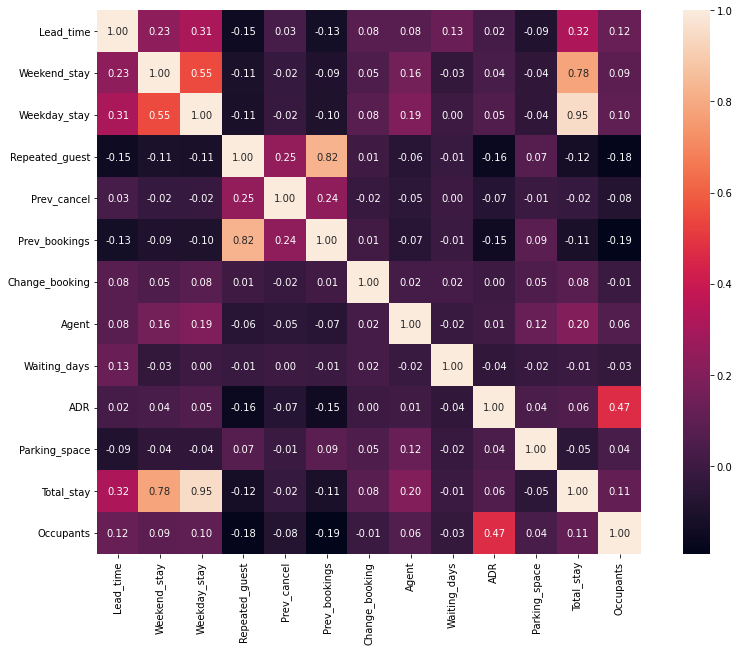

In [33]:
df = hotel[['Lead_time','Weekend_stay','Weekday_stay','Repeated_guest','Prev_cancel','Prev_bookings','Change_booking','Deposit_type','Agent','Waiting_days','Customer_type','ADR','Parking_space','Total_stay','Occupants' ]]
corr_df = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_df,square=True,annot = True,fmt='.2f', annot_kws={'size': 10},)

##1)Which hotel has highest percentage of guests?

     Hotel Name  Booking Percentage
0    City Hotel           61.451884
1  Resort Hotel           38.548116


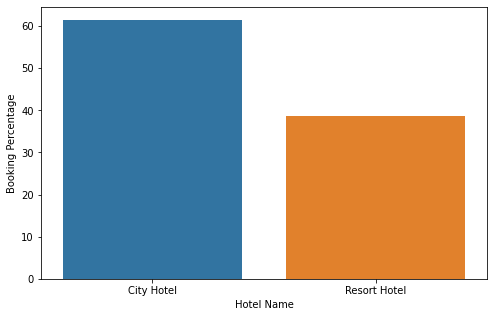

In [34]:
#cCalculating the percentage and storing in new dataframe with custom index
k1=(hotel['Hotel_name'].value_counts(normalize=True)*100).reset_index().rename(columns={'index':'Hotel Name','Hotel_name':'Booking Percentage'})
print(k1)
plt.figure(figsize=(8,5))
#plotting barplot
sns.barplot(y=k1['Booking Percentage'],x=k1['Hotel Name'])
plt.show()

###**Inference** : City Hotel has 61.44 percentage of guests and Resort hotel has 38.55 percentage of guests.More guests showed interest to reside on City Hotel.

##2) Which type of meal is ordered the most?

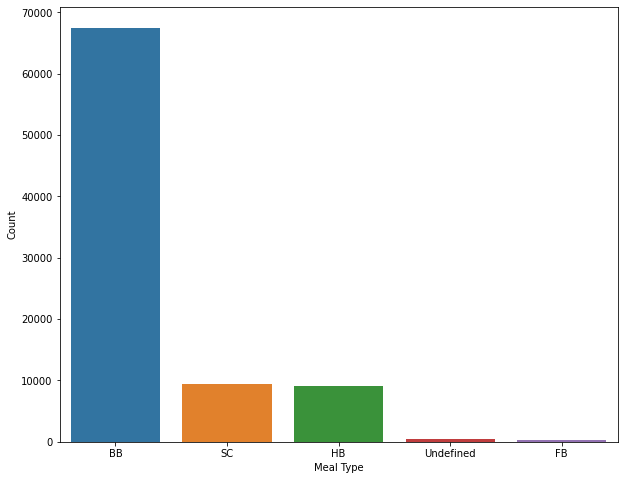

,Meal Type,Count
0,BB,67522
1,SC,9474
2,HB,9052
3,Undefined,488
4,FB,358


In [35]:
#calculating the meal count ans storing in new dataframe for plotting
k2=hotel['Meal'].value_counts().reset_index().rename(columns={'index':'Meal Type','Meal':'Count'})
plt.figure( figsize=(10, 8))
sns.barplot(y=k2['Count'],x=k2['Meal Type'])
plt.show()
k2

###**Inference** : BB Type of meal was ordered by most of the guests

##3) Which Country has most number of guests?

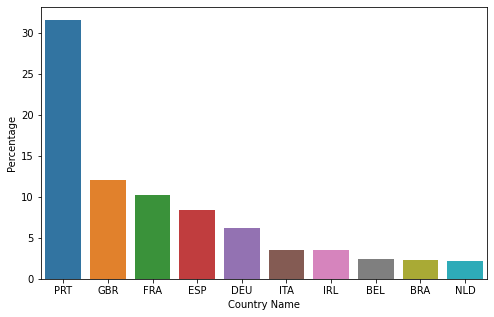

In [36]:
#calculating the percentage of guests and storing in new dataframe
k3=(hotel['Country'].value_counts(normalize=True)*100).reset_index().rename(columns={'index':'Country Name','Country':'Percentage'})
plt.figure(figsize=(8,5))
k3=k3[:10]
#plotting barplot
sns.barplot(y=k3['Percentage'],x=k3['Country Name'])
plt.show()

###**Inference:** The maximum percentage of guests are from Portugal, followed by Great Britain.

##4) What are the number of bookings per year for each hotel?

Text(0, 0.5, 'Number of bookings')

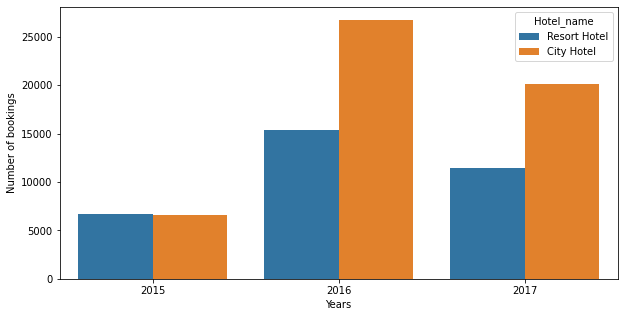

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x= hotel['Visit_year'] ,data=hotel ,hue='Hotel_name')  #directly plotting the data as no separate calculation required
plt.xlabel('Years')               #custom labels for axes
plt.ylabel('Number of bookings')

###**Inference:** From the above figure we can see the number of bookings for each year in the data. For the year 2015 the number of bookings for Resort hotel were slighty more than for City hotel. However, in the years 2016 and 2017 the bookings for City hotel are considerably higher than Resort hotel.

##5) Which Distribution Channel is most common for hotel bookings, year wise?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Distribution channel')

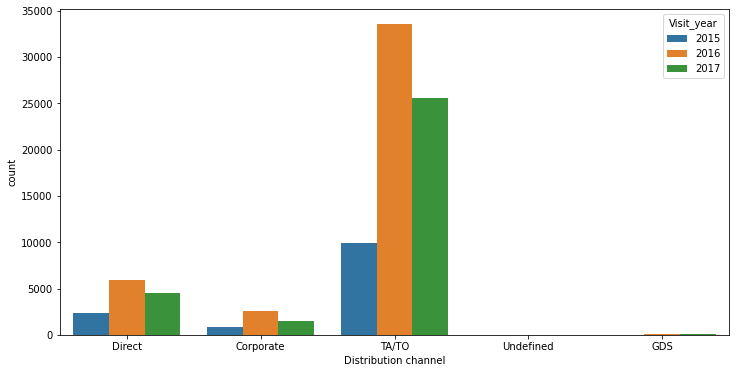

In [38]:
#plotting the required data direclty with year categorization
plt.figure(figsize=(12,6))
sns.countplot(hotel.Dist_channel, hue=hotel['Visit_year'])
plt.xlabel('Distribution channel')    #custom label

###**Inference:** We can see that the the hotels recieve the maximum number of bookings fro Travel agents/Travel offices.

##6) Which booking has highest cancellation percentage according to distribution channel?

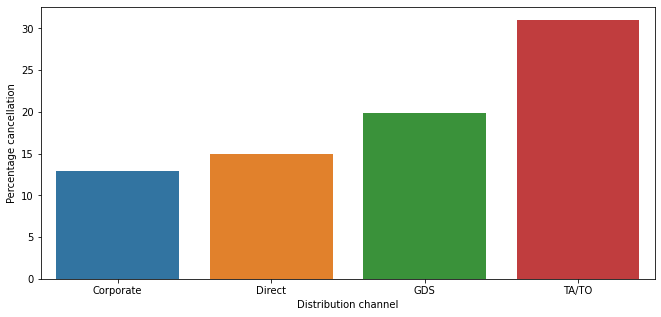

In [39]:
#groupby of distribution channel and storing it as pandas dataframe
hotel_goup_by = hotel.groupby('Dist_channel')
df_c = pd.DataFrame((hotel_goup_by['Canceled'].sum()/hotel_goup_by.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Percentage cancellation'})

#plotting a barplot
plt.figure(figsize = (11,5))
sns.barplot(x = df_c.index, y = df_c['Percentage cancellation'])
plt.xlabel('Distribution channel')
plt.show()

###**Inference:** The maximum percentage of cancellations are observed for the bookings done by Tavel Agents/Travel officers.

##7) What are the type of customers that are repeated in the hotels?

Text(0, 0.5, 'Repeated Count')

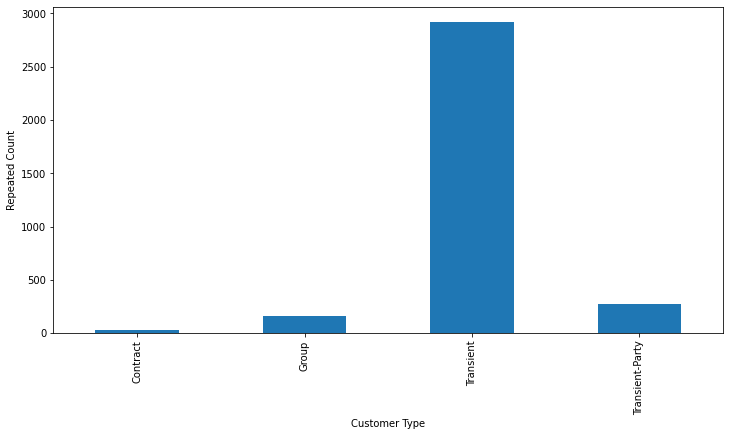

In [40]:
repeat_customer = hotel[hotel['Repeated_guest']==1]   #obtaining repeated guest data
df_repeat= repeat_customer.groupby(['Customer_type']).size()  #perform required groupby
df_repeat.plot(kind='bar',figsize=(12,6))     #plotting the barchart
plt.xlabel('Customer Type')
plt.ylabel('Repeated Count')

###**Inference:** The type of customer which have the most repeated bookings is the Transient type.

##8) What is the optimal length of stay for the best daily price?

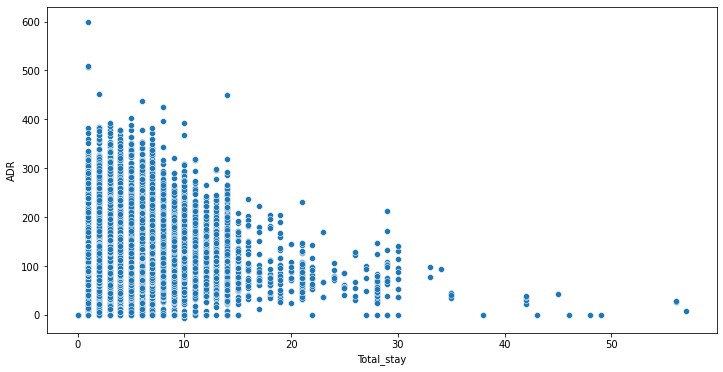

In [41]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=hotel, x='Total_stay', y='ADR')  #directly plotting the total stay across applicable daily rates

###**Inference:** Here we can see how the ADR varies with the duration of the stay. As the duration increases the ADR slightly decreases and with the duration more than 2 weeks a noticable difference can be seen.Thus we can say that the optimal duration of stay for better Average daily rate is roughly around 2 weeks.

##9) What is the preffered duration of stay for customers?

Text(0, 0.5, 'Number of bookings')

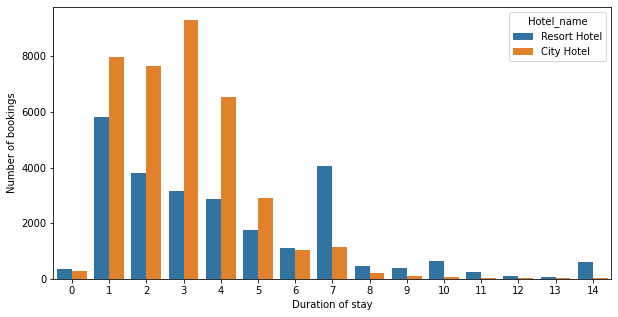

In [42]:
actual_guests = hotel[hotel['Canceled']==0]     #obtaining required data
d1= actual_guests[actual_guests['Total_stay']<15]  #storing data for stay upto 2 weeks
plt.figure(figsize=(10,5))
sns.countplot(x= d1['Total_stay'],hue= d1['Hotel_name'])
plt.xlabel('Duration of stay')
plt.ylabel('Number of bookings')

###**Inference:** In the above figure we can observe the number of bookings based on total duration of stay. The most number of bookings are for a period of less than 5 days. After which we can see the bookings decrease. it can also be observed that Resort hotel has more number of bookings for longer durations.

##10) What is the busiest month for the hotels?

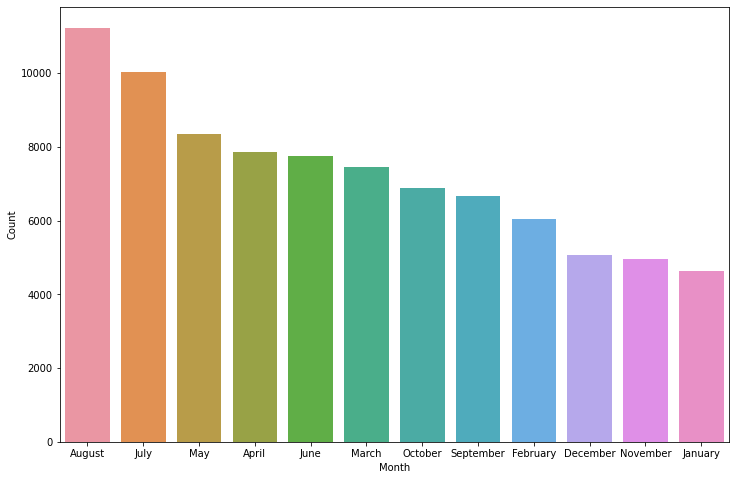

In [43]:
#storing the required data in new dataframe with custom index
k2=hotel['Visit_month'].value_counts().reset_index().rename(columns={'index':'Month','Visit_month':'Count'})
plt.figure( figsize=(12, 8))
sns.barplot(y=k2['Count'],x=k2['Month'])
plt.show()

###**Inference:** We can see the busiest month for the hotels i.e. the month with the most bookings is the month of August.

##11)What is the booking comaprison for the hotels throughout the year?

Text(0, 0.5, 'Number of bookings')

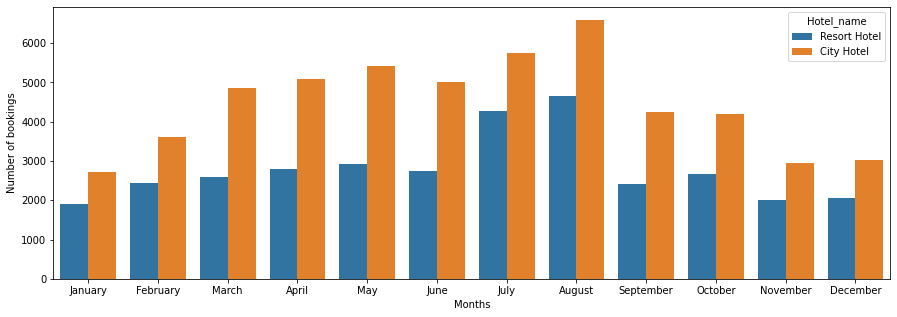

In [44]:
Months_odr= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']  #list for custom order while plotting
plt.figure(figsize= (15,5))
sns.countplot(x=hotel['Visit_month'], data= hotel, order=Months_odr, hue='Hotel_name')  #plot shown for both hotels
plt.xlabel('Months')
plt.ylabel('Number of bookings')

###**Inference:** The above figure displays the Number of bookings in each hotel shown monthly. We can infer that the months of July and August have the most bookings for both the hotels. We can also conclude that throughout the year the bookings in City hotel are more than the bookings in Resort hotel.

##12) What is the booking variations for the hotels wrt date of the month?

Text(0, 0.5, 'Number of bookings')

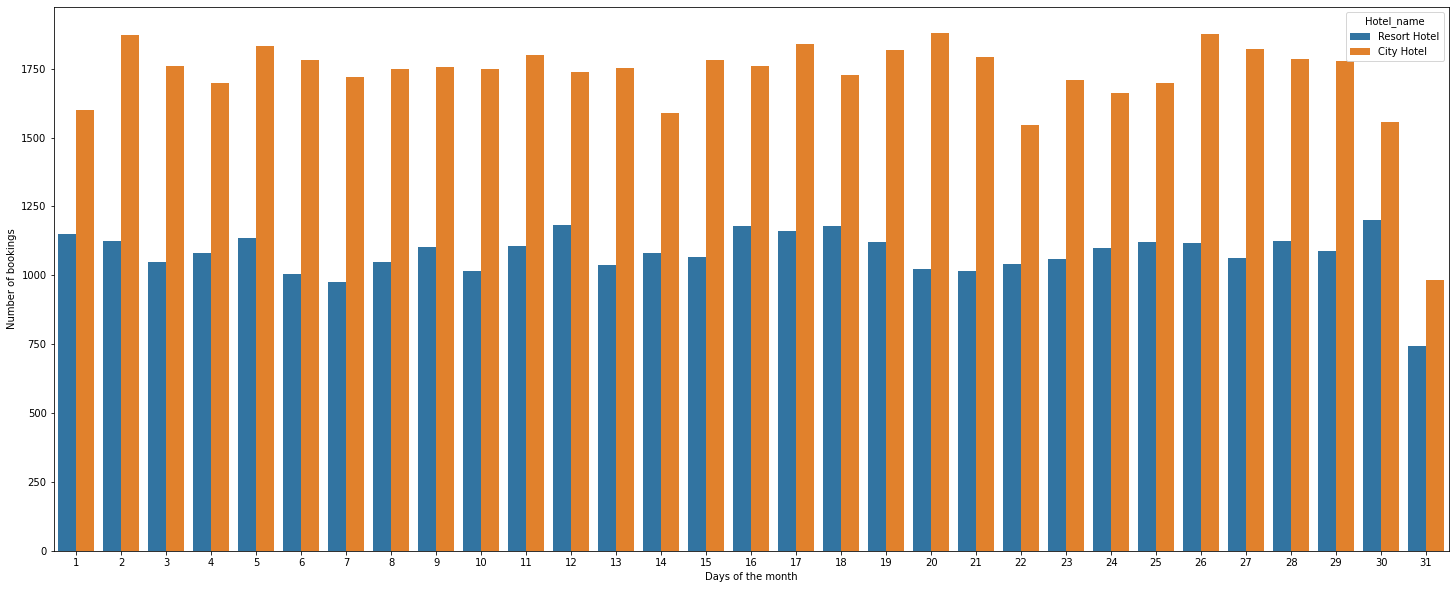

In [45]:
plt.figure(figsize=(25,10))
sns.countplot(x='Visit_date', data=hotel, hue='Hotel_name') #plotting count plot for pre-stored dates in the dataframe
plt.xlabel('Days of the month')
plt.ylabel('Number of bookings')

###**Inference:**We can see that the bookings throughout the month are fairly the same, with a decrease in the bookings observed by the end of the month.

##13) What is the variation of the Daily Rate throughout the month?

Text(0, 0.5, 'Average Daily Rate')

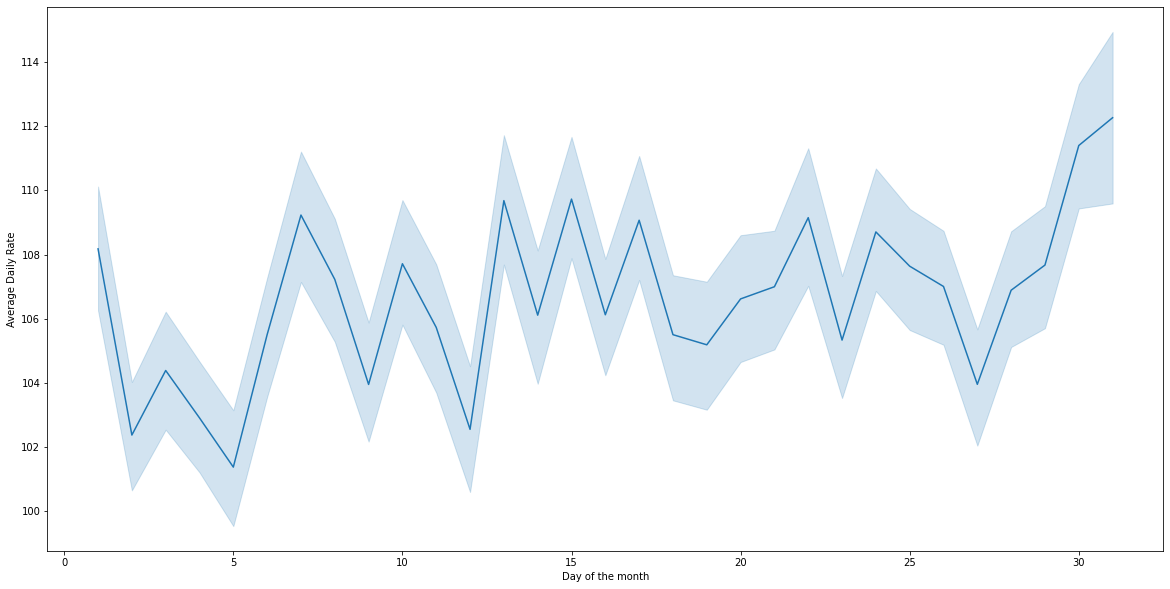

In [46]:
plt.figure(figsize=(20,10))
sns.lineplot(x = 'Visit_date', y = 'ADR', data=hotel)     #plotting lineplot with the required parameters
plt.xlabel('Day of the month')
plt.ylabel('Average Daily Rate')

###**Inference:** We can infer that the Average daily rate vaires a lot throughout the year with increase in daily rate being observed on days lower bookings to obtain a good revenue throughout the month. Also a rise in the ADR is observed around the end of the month.

##14) What is the volume of bookings throughout the year based on the Type of Occupants? (Categorized as Single, Couple, Family)

In [47]:
#giving conditions and values for new column
conditions = [(actual_guests['Adults']==1) & (actual_guests['Kids']==0),
  (actual_guests['Adults']==2) & (actual_guests['Kids']==0),
  (actual_guests['Adults']+ actual_guests['Kids']>=2)]

values = ['Single','Couple','Family']

#creating the column using np.select
actual_guests['Type_of_occ'] = np.select(conditions, values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [48]:
#removing the null values
actual_guests= actual_guests[actual_guests.Type_of_occ!= '0']

In [49]:
#changing the month data to categorical data for custom sorting
actual_guests['Visit_month']= pd.Categorical(actual_guests['Visit_month'],Months_odr)

In [50]:
#storing groupby in new variable for plotting
type_df= actual_guests.groupby(['Visit_month','Type_of_occ'],sort= True)['Visit_month'].count().unstack()
type_df

Type_of_occ,Couple,Family,Single
Visit_month,,,
January,2087,352,1152
February,2842,639,1130
March,3583,605,1414
April,3573,815,1070
May,3981,621,1284
June,3685,739,967
July,4311,1864,644
August,4841,2105,653
September,3474,494,1045


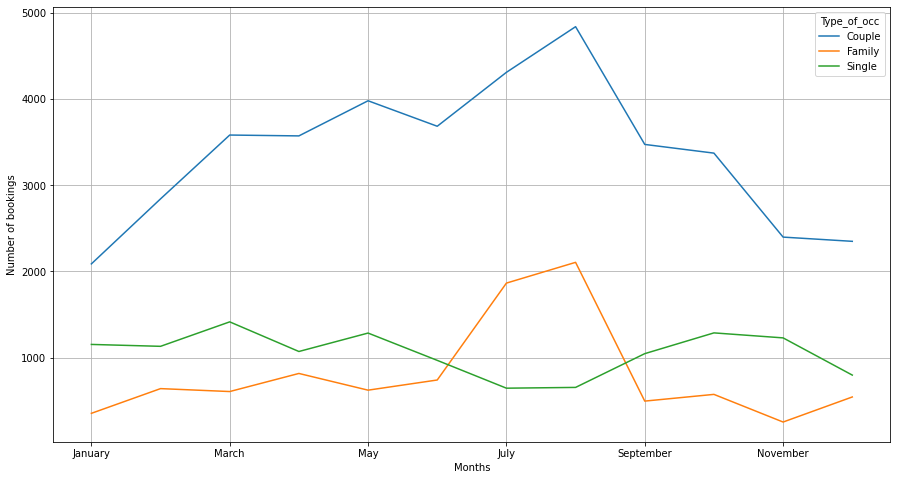

In [51]:
type_df.plot()
plt.gcf().set_size_inches(15, 8)    #using gcf().set_size_inches inplace of figsize for better size of plot 
plt.xlabel('Months')
plt.ylabel('Number of bookings')
plt.grid()                          #done to show the grid for better visualisation

###**Inference:**We can see that the booking for Single occupants stay fairly low throughout the year. The bookings for families visiting the hotels has an increase in the months of July and August which were previously observed to be the busiest months. We can also observe that the most number of bookings in the hotels are made by couples throughout the year for both hotels with highest bookings being in the month of August and July.

##<B>Conclusion:


*   City hotel has 61.44 % of the total bookings from the available data whereas resort hotel has 38.55% of the bookings.
* BB is the most popular meal type.
* Portugal has the most number of bookings followed by Great Britain.
* The number of bookings are more in City hotel for the years 2016 and 2017.
* Amongst the various distribution channels bookings through TA/TO is highest, followed by bookings done directly.
* As compared to the bookings through the Distribution channels the cancellation of these bookings is fairly close with TA/TO having 30% and GDS having 20% of the total cancellations.
* Transient i.e. traveling customers have the highest repeated bookings. Some offers or complimentary services can be provided to all of these categories to have more bookings in the future.
* Though the majority of the bookings are preferred for a duration of upto 5 days, the ADR is almost constant for stay upto a week.
* For longer stay durations with the best daily price a duration of 15-20 days is optimal.
* It is observed that the number of bookings are more for resort hotel than city hotel for durations more than a week.
*August and July are the busiest month for both the hotels.
*The daily rate has small peaks throughout the month which could be due to higher rates on weekends. Also the rate is observed to be higher during the end of the month.
*Throughout the year the majority of bookings are through the bookings made by couples. Singles occupants have fairly a constant value throughout the year.
Bookings made by families has its peak in the monnths of July and August but is low during the rest of the year.



##<b>Thank you!